Allemaal dit deel runnen, daarna je eigen deel runnen. KLIK NIET RUN ALLLL!!!!!!

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
    Samplers,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time
dike_model, planning_steps = get_model_for_problem_formulation(2)



In [2]:
n_scenarios = 10000
#n_policies = 300

def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}

policies = [
    Policy(
        "policy 0",
        **dict(
            get_do_nothing_dict()
        )
    ),
]

hello

Hier goed je eigen deel selecteren.Je hoort dus een van de drie blokjes maar te kiezen

Twan

In [3]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_scenarios, policies=policies, uncertainty_sampling=Samplers.LHS)

100%|████████████████████████████████████| 10000/10000 [22:12<00:00,  7.50it/s]


Pien

In [2]:
# running the model through EMA workbench
# 32, 64, 128
n_scenarios = 64
n_policies = 48

with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_scenarios, policies=n_policies, uncertainty_sampling=Samplers.SOBOL)

100%|████████████████████████████████| 122880/122880 [3:24:35<00:00, 10.01it/s]


Merel

In [ ]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_scenarios, policies=n_policies)

100%|████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]


Allemaal dit deel runnen nadat je alleen je eigen deel hebt geselecteerd

In [4]:
experiments, outcomes = results

In [6]:
import os
from datetime import datetime

# Get the current date in YYYY-MM-DD_HH-MM format
current_date = datetime.now().strftime('%Y-%m-%d_%H-%M')

# Define the folder path
folder_name = "results"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)  # Create the folder if it doesn't exist

# Save experiments DataFrame to a CSV file in the folder
experiments.to_csv(os.path.join(folder_name, f'scenario_exploration_experiments_{current_date}.csv'), index=False)

# Save outcomes DataFrame to a CSV file in the folder
flattened_data = {key: value.flatten() for key, value in outcomes.items()}
df_outcomes = pd.DataFrame(flattened_data)

#df_outcomes = pd.DataFrame(outcomes)
df_outcomes.to_csv(os.path.join(folder_name, f'scenario_exploration_outcomes_{current_date}.csv'), index=False)

print(f"Experiments and outcomes saved in the '{folder_name}' folder with date {current_date}.")

Experiments and outcomes saved in the 'results' folder with date 2025-06-05_16-35.


Verander de naam zodat SOBOL oid erin zit

In [36]:
import pandas as pd

# Define the folder path and file names
folder_name = "results"
current_date = "2025-06-03"  # Replace with the exact date if needed

# Load the experiments DataFrame
experiments = pd.read_csv(f"{folder_name}/SOBOL_experiments_2025-06-03_12-16.csv")

# Load the outcomes DataFrame
outcomes = pd.read_csv(f"{folder_name}/SOBOL_outcomes_2025-06-03_12-16.csv")

print("DataFrames recreated from stored CSV files.")

DataFrames recreated from stored CSV files.


In [37]:

experiment_levers = experiments.drop(['scenario', 'policy', 'model'], axis = 1 )
df_outcomes = outcomes

outcomes.columns


Index(['A.1_Expected Annual Damage', 'A.1_Dike Investment Costs',
       'A.1_Expected Number of Deaths', 'A.2_Expected Annual Damage',
       'A.2_Dike Investment Costs', 'A.2_Expected Number of Deaths',
       'A.3_Expected Annual Damage', 'A.3_Dike Investment Costs',
       'A.3_Expected Number of Deaths', 'A.4_Expected Annual Damage',
       'A.4_Dike Investment Costs', 'A.4_Expected Number of Deaths',
       'A.5_Expected Annual Damage', 'A.5_Dike Investment Costs',
       'A.5_Expected Number of Deaths', 'RfR Total Costs',
       'Expected Evacuation Costs'],
      dtype='object')

C:\Users\Pkast\Documents\EPA-Master\EPA141A - Model-based Decision Making\project\venv\Lib\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

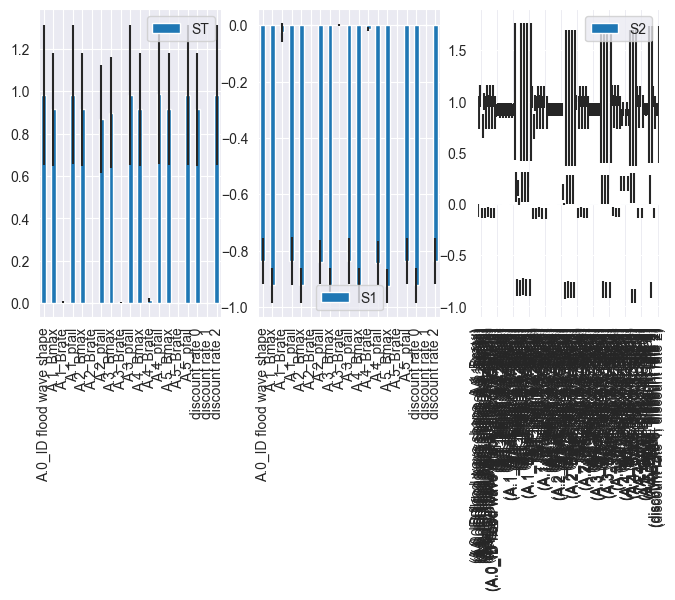

In [38]:
# Step 1: Identify all the relevant death columns
death_cols = [col for col in outcomes.columns if 'Expected Number of Deaths' in col]

# Step 2: Create a new column that sums them row-wise
outcomes['Total Expected Deaths'] = outcomes[death_cols].sum(axis=1)

# Step 3: Run the Sobol analysis on that combined outcome
y = outcomes['Total Expected Deaths'].to_numpy()

from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from SALib.analyze import sobol

problem = get_SALib_problem(dike_model.uncertainties)

#Si = sobol.analyze(problem, y, calc_second_order=True, print_to_console=True)

sobol_results = {}
for policy in experiments.policy.unique():
    logical = experiments.policy == policy
    indices = sobol.analyze(problem, y)
    sobol_results[policy] = indices

fig, axes = plt.subplots(1,3)
fig.set_size_inches(8, 4)
indices.plot(ax=axes)

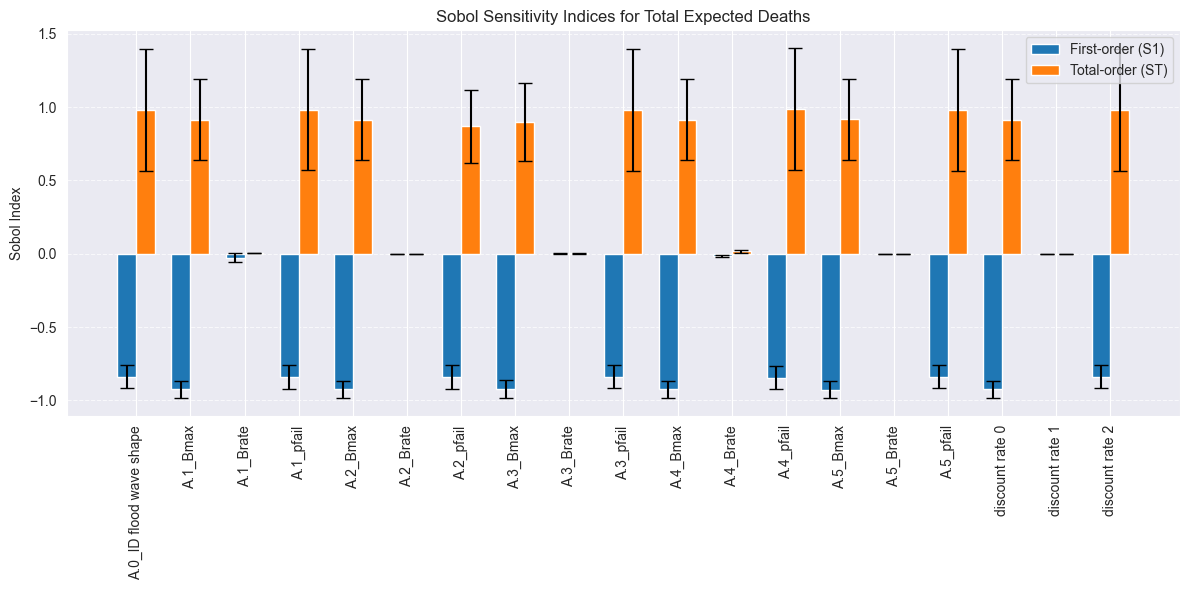

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Extract values and parameter names
S1 = Si['S1']
ST = Si['ST']
S1_conf = Si['S1_conf']
ST_conf = Si['ST_conf']
param_names = problem['names']

# Bar plot
x = np.arange(len(param_names))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, S1, width, yerr=S1_conf, capsize=5, label='First-order (S1)')
plt.bar(x + width/2, ST, width, yerr=ST_conf, capsize=5, label='Total-order (ST)')
plt.xticks(x, param_names, rotation=90)
plt.ylabel("Sobol Index")
plt.title("Sobol Sensitivity Indices for Total Expected Deaths")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


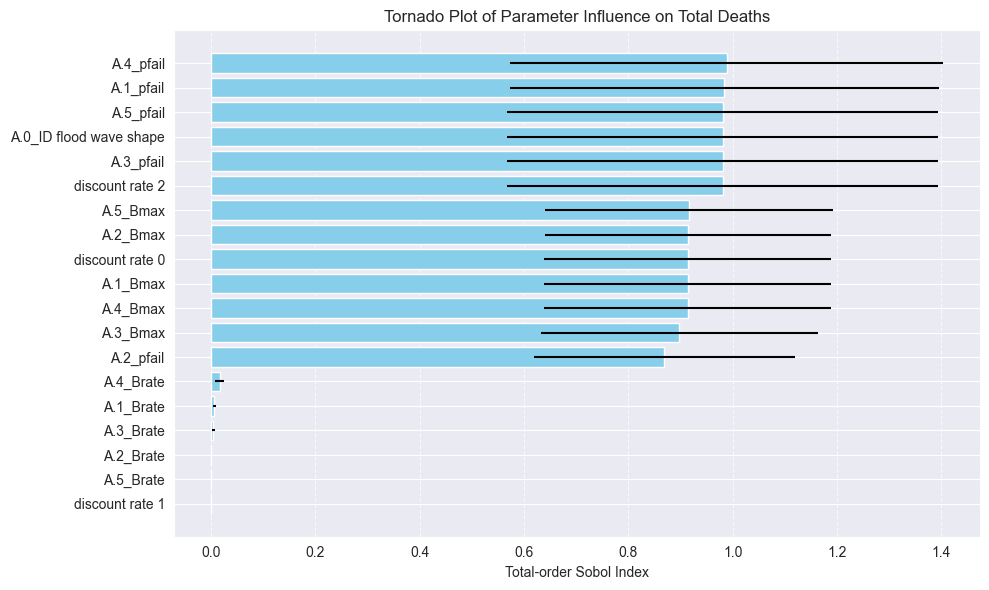

In [33]:
sorted_indices = np.argsort(ST)[::-1]
sorted_params = [param_names[i] for i in sorted_indices]
sorted_ST = ST[sorted_indices]
sorted_ST_conf = ST_conf[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_params, sorted_ST, xerr=sorted_ST_conf, color='skyblue')
plt.xlabel("Total-order Sobol Index")
plt.title("Tornado Plot of Parameter Influence on Total Deaths")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


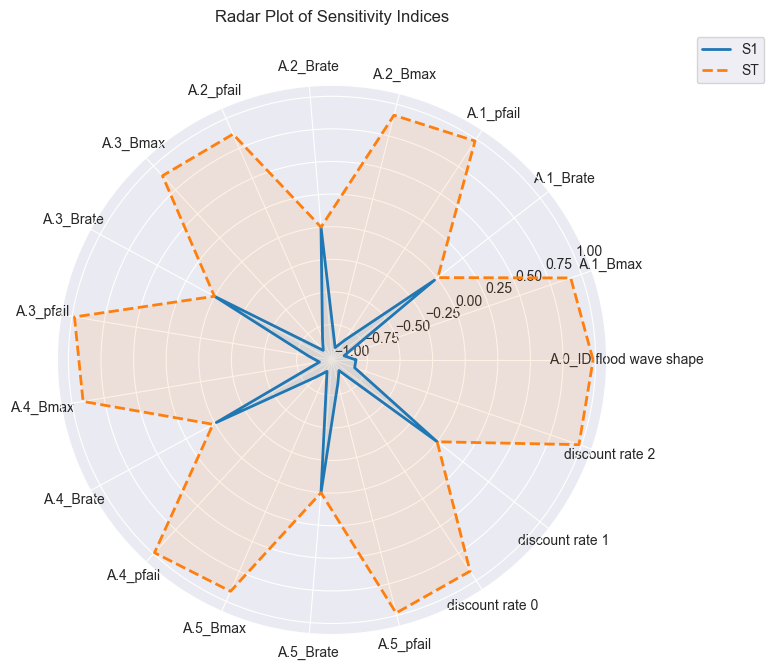

In [35]:
from math import pi

categories = param_names
N = len(categories)

# Prepare values
values_S1 = np.append(S1, S1[0])  # Close the loop
values_ST = np.append(ST, ST[0])
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values_S1, linewidth=2, linestyle='solid', label='S1')
ax.fill(angles, values_S1, alpha=0.1)
ax.plot(angles, values_ST, linewidth=2, linestyle='dashed', label='ST')
ax.fill(angles, values_ST, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
plt.title("Radar Plot of Sensitivity Indices", y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()
